In [1]:
# Load Dataset and libraries

In [2]:
! nvidia-smi -L

In [3]:
import pandas as pd
import numpy as np
import string
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import seaborn as sns

In [4]:
df = pd.read_csv("final_dataset.csv")
df['news_site'] = df['publisher'].apply(lambda x: eval(x)['title'] if isinstance(x, str) else None)
df_clean = df[['news_site', 'title']]
df_clean.head(10)

,news_site,title
0,Prism,Pro-Palestine student organizers face crackdow...
1,The Oklahoma Daily,"150 students take part in pro-Palestine, pro-I..."
2,Tufts Daily,Students protest Kumar’s condemnation of TCU S...
3,The Amherst Student,Amherst for Palestine Demands Divestment Outsi...
4,Inside Higher Ed,Columbia's protest policy less stringent than ...
5,The Vanderbilt Hustler,Vanderbilt students protest for prison reform ...
6,ABC 10 News San Diego KGTV,UCSD students organize large protest in suppor...
7,Harvard Crimson,Student Protesters Accuse Harvard Administrato...
8,WSKG.org,Ithaca Common Council calls for ceasefire in I...
9,Tufts Daily,Students allege police aggression at Nov. 17 p...


In [5]:
# Vectorize using Word2Vec

In [6]:
def remove_after_last_hyphen(s):
    last_hyphen_index = s.rfind(' - ')
    if last_hyphen_index != -1:
        return s[:last_hyphen_index].strip()
    return s

df_clean['processed_title'] = df_clean['title'].str.lower()
df_clean['processed_title'] = df_clean['processed_title'].apply(remove_after_last_hyphen)
df_clean['processed_title'] = df_clean['processed_title'].str.translate(str.maketrans('', '', string.punctuation))
df_clean['processed_title'] = df_clean['processed_title'].str.split()

sentences = df_clean['processed_title'].tolist()
word2vec = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

/var/folders/p3/nfh6l6hn58q316g9ty88_q9r0000gn/T/ipykernel_32576/4036667143.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['processed_title'] = df_clean['title'].str.lower()
/var/folders/p3/nfh6l6hn58q316g9ty88_q9r0000gn/T/ipykernel_32576/4036667143.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['processed_title'] = df_clean['processed_title'].apply(remove_after_last_hyphen)
/var/folders/p3/nfh6l6hn58q316g9ty88_q9r0000gn/T/ipykernel_32576/4036667143.py:9: SettingWithCopyWarning: 

In [7]:
vectors = []
for tokens in df_clean['processed_title']:
    vectors.append(np.mean([word2vec.wv[word] for word in tokens if word in word2vec.wv] or [np.zeros(word2vec.vector_size)], axis=0))

In [8]:
headline_vectors = pd.DataFrame(vectors)
headline_vectors.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.002730,0.004770,0.002855,0.001374,0.000431,-0.008082,0.002857,0.014642,-0.006709,-0.006863,...,0.010006,0.002647,-0.000453,0.003366,0.012094,0.003743,0.000350,-0.003157,-0.000046,-0.002870
1,-0.002927,0.007012,0.000573,0.003121,0.002709,-0.007966,0.005301,0.014564,-0.006166,-0.004017,...,0.008687,0.004365,-0.000451,0.001295,0.014028,0.005920,0.004615,-0.007186,-0.002774,-0.000491
2,-0.008347,0.005164,0.002727,-0.001477,-0.001407,-0.012182,0.001312,0.011591,-0.008737,-0.001587,...,0.009372,0.002911,-0.000490,0.002763,0.013901,0.006013,0.005635,-0.006184,0.001301,-0.004906
3,-0.002987,0.007399,-0.000726,-0.000178,0.000360,-0.006956,0.001500,0.007216,-0.002705,-0.001360,...,0.008303,-0.002709,-0.001531,0.002753,0.007217,-0.001085,0.003607,-0.003623,-0.002812,0.001139
4,-0.001880,0.002738,0.004604,0.002519,0.003813,-0.003790,0.003646,0.008597,-0.007829,-0.000046,...,0.003261,0.000350,0.001033,-0.000464,0.004488,0.003491,0.001080,-0.003755,-0.003574,-0.000858
5,-0.004928,0.007885,0.002361,0.003291,0.000628,-0.015570,0.001904,0.017637,-0.011654,-0.004016,...,0.016068,0.003795,0.000739,0.003876,0.014529,0.009865,0.006172,-0.008673,-0.002921,-0.002248
6,-0.005624,0.011471,0.002869,0.001385,-0.001447,-0.013618,0.001163,0.018063,-0.010287,-0.007706,...,0.017796,0.003870,-0.000743,0.000143,0.015396,0.007523,0.005143,-0.010718,0.000039,-0.002054
7,-0.006200,0.008242,0.000401,0.006866,-0.001362,-0.010023,0.004463,0.019085,-0.012752,-0.004349,...,0.014138,0.002333,-0.001012,0.001560,0.017100,0.009191,0.003607,-0.007143,0.001226,-0.002861
8,-0.005219,0.009579,0.001283,0.000946,-0.000702,-0.012168,0.000940,0.016839,-0.008430,-0.005412,...,0.011759,0.002228,-0.000555,0.001063,0.014246,0.004840,0.005889,-0.007818,-0.002804,0.000027
9,-0.005841,0.009952,-0.001354,0.003799,-0.000531,-0.011325,0.001521,0.015612,-0.007850,-0.002578,...,0.013291,0.005742,0.002242,-0.002146,0.012042,0.007344,0.005862,-0.003180,-0.003638,0.000446


# Cluster

/Users/joycehu/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/p3/nfh6l6hn58q316g9ty88_q9r0000gn/T/ipykernel_32576/3553328283.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cluster'] = km.labels_


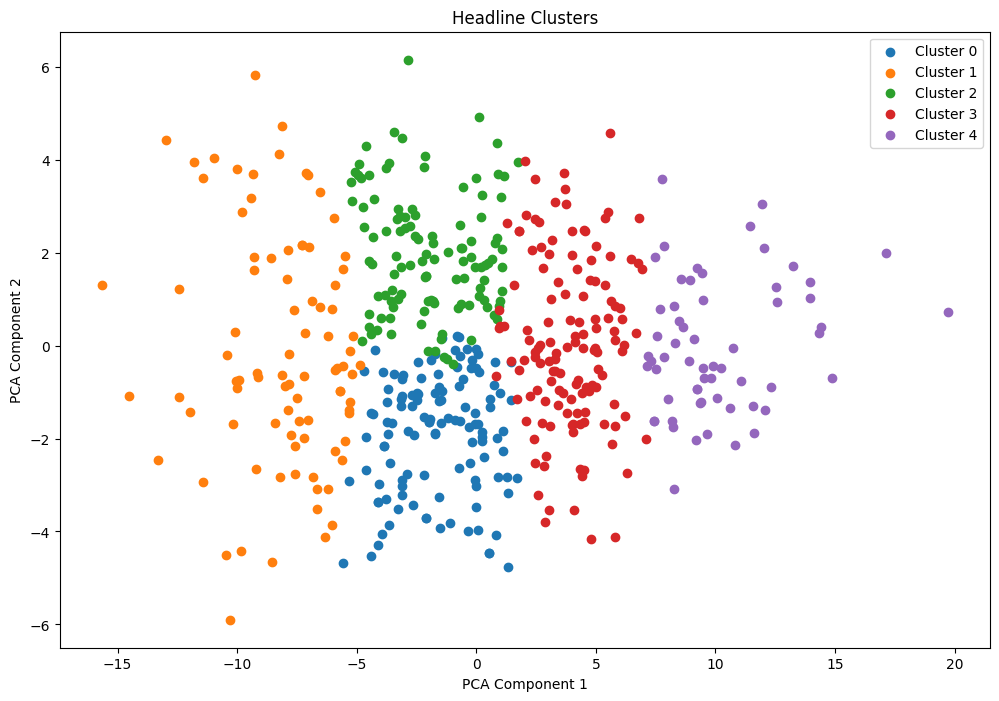

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(headline_vectors)

num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(X_scaled)
df_clean['cluster'] = km.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
for cluster in range(num_clusters):
    plt.scatter(X_pca[df_clean['cluster'] == cluster, 0], X_pca[df_clean['cluster'] == cluster, 1], label=f'Cluster {cluster}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Headline Clusters')
plt.legend()
plt.show()

In [10]:
for cluster in sorted(df_clean['cluster'].unique()):
    print(f"\nCluster {cluster} Sample Headlines:")
    sample_headlines = df_clean[df_clean['cluster'] == cluster]['title'].sample(5, random_state=42).tolist()
    for headline in sample_headlines:
        print(f"- {headline}")


Cluster 0 Sample Headlines:
- I’m a Harvard professor. The extremism of student protesters reminds me of the worst I saw as an undergraduate in the 1960s - Forward
- Pro-Palestinian college protests watched closely by NYC high school students - Chalkbeat
- Students are protesting Cornell's response to the war in Gaza. Now they say they're being disciplined - WSKG.org
- Rutgers, student protesters reach agreement, encampment ends - NorthJersey.com
- Columbia student recounts having a ‘front row seat to the madness’ of anti-Israel protests - Fox News

Cluster 1 Sample Headlines:
- Handful of students protest war in Gaza at UW-Madison commencement - WPR
- UK students occupy university building in protest for Palestine - Al Jazeera English
- Over 100 Arrested at Columbia After Pro-Palestinian Protest - The New York Times
- Columbia University protests: Pro-Palestinian demonstrators lend support to students staging sit-in - WABC-TV
- Nineteen California college students arrested over pro-P

In [11]:
# Will add another cluster by political leaning instead of word2vec

In [12]:
# NOTE: Aside from clustering, use semantic analysis and or recluster by political leaning of news outlets.
# Will add politcal leanings to test data to see how clustering will work out.

In [13]:
# Simulated Political Leaning Scores

In [14]:
values = [-1, -0.5, 0, 0.5, 1]
df_clean['Political Leaning'] = np.random.choice(values, size=len(df_clean))

/var/folders/p3/nfh6l6hn58q316g9ty88_q9r0000gn/T/ipykernel_32576/1362126679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Political Leaning'] = np.random.choice(values, size=len(df_clean))


In [15]:
# Wordcloud with top 5 words removed (Markdown)

for cluster_num in range(num_clusters):
    cluster_data = df_clean[df_clean['cluster'] == cluster_num]
    text = ' '.join(cluster_data['title'].tolist())
    words = text.split()
    word_counts = Counter(words)
    most_common_words = [word for word, _ in word_counts.most_common(5)]
    filtered_words = [word for word in words if word not in most_common_words]
    filtered_text = ' '.join(filtered_words)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster_num} (Top 5 Words Removed)')
    plt.axis('off')
    plt.show()

In [16]:
# Wordcloud with specific keywords targeted

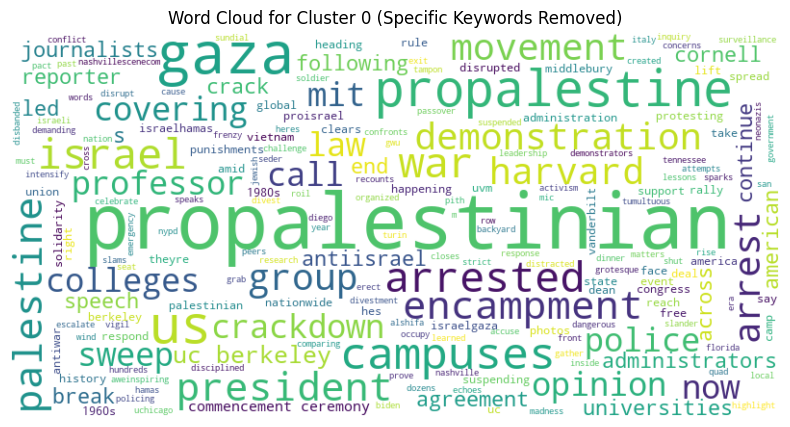

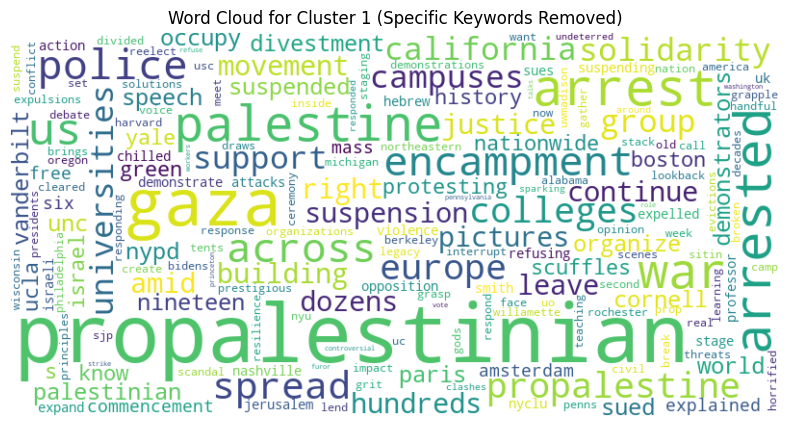

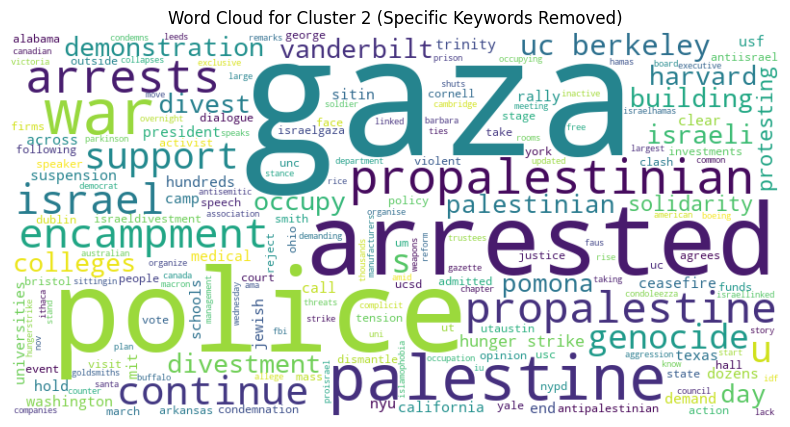

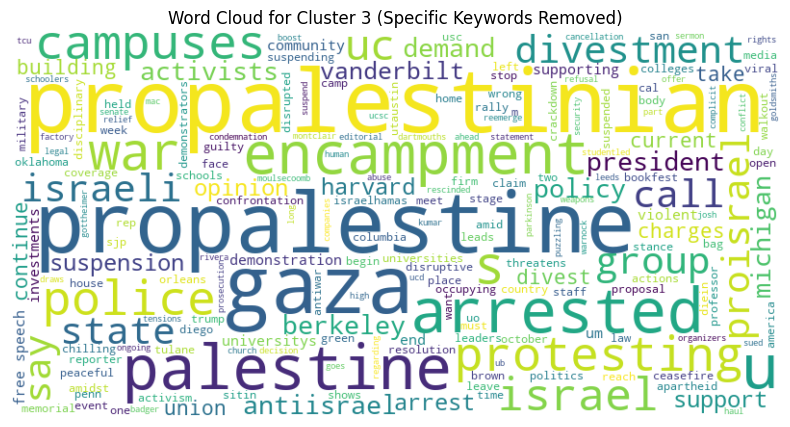

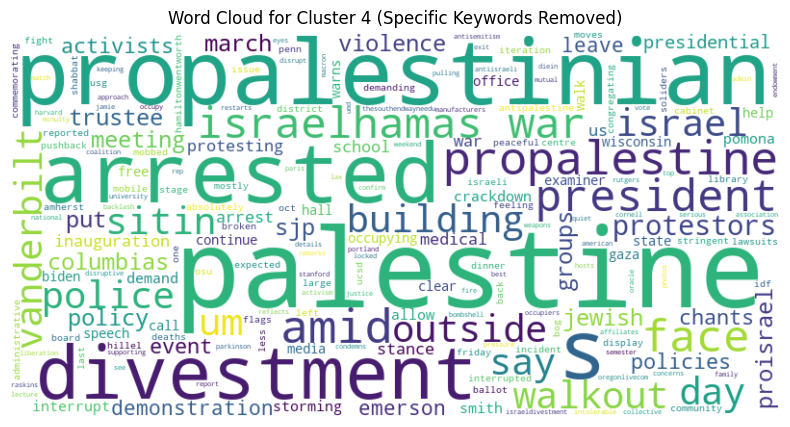

In [17]:
keywords_to_remove = {'student', 'students','university', 'college', 
                      'school', 'education', 'campus', 'class', 
                      'course', 'degree', 'faculty', 'protest', 
                     'protesters', 'protester', 'new', 'news', 'protests', 'columbia'}


for cluster_num in range(num_clusters):
    cluster_data = df_clean[df_clean['cluster'] == cluster_num]['processed_title'].tolist()
    title_list = [word for inner_lst in cluster_data for word in inner_lst]
    text = ' '.join(title_list)
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in keywords_to_remove]
    filtered_text = ' '.join(filtered_words)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster_num} (Specific Keywords Removed)')
    plt.axis('off')
    plt.show()

# Linear Regression 

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
X_lin = np.vstack(headline_vectors.values)
y_lin = df_clean['Political Leaning'].values

X_train, X_test, y_train, y_test = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

coefficients = pd.DataFrame(reg_model.coef_, index=range(100), columns=['Coefficient'])

mse, r2, coefficients.head()

(0.6915107405457579,
 -0.19483688162353419,
    Coefficient
 0    17.379227
 1    13.897186
 2     6.351784
 3    31.816383
 4    31.913303)

## Relationship Between Political Learning Score and Sentiment 

In [20]:
biases = pd.read_excel('political_leaning.xlsx').loc[:,['news_site', 'score']].dropna()
biases.head()

,news_site,score
0,CNN,-1.0
1,The Associated Press,-0.5
4,NBC News,-1.0
6,ABC News,-0.5
7,ABC 10 News San Diego KGTV,-0.5


Text(0.5, 1.0, 'Distribution of Political Learning Score')

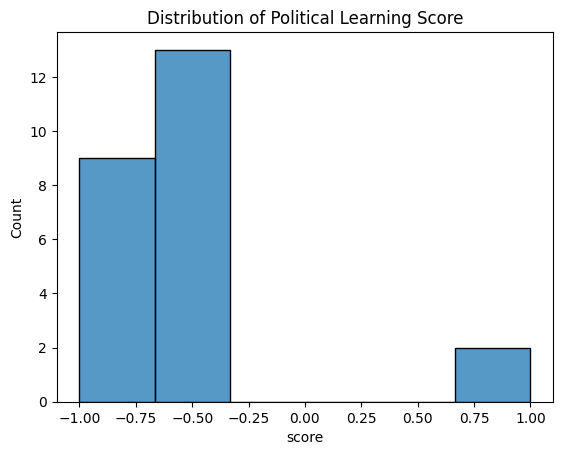

In [21]:
sns.histplot(biases['score'])
plt.title('Distribution of Political Learning Score')

In [22]:
df_bias = df_clean.merge(biases, on='news_site', how='right')
df_bias

,news_site,title,processed_title,cluster,Political Leaning,score
0,CNN,Students at more universities announce solidar...,"[students, at, more, universities, announce, s...",2,0.0,-1.0
1,CNN,"April 27, 2024 - Campus protest updates - CNN","[april, 27, 2024, campus, protest, updates]",4,-0.5,-1.0
2,CNN,Where pro-Palestinian university protests are ...,"[where, propalestinian, university, protests, ...",0,0.5,-1.0
3,CNN,"At the student protest at UPenn, passions are ...","[at, the, student, protest, at, upenn, passion...",2,-1.0,-1.0
4,CNN,In pictures: A lookback at student protest mov...,"[in, pictures, a, lookback, at, student, prote...",1,1.0,-1.0
...,...,...,...,...,...,...
126,TIME,6 Penn Students Among Pro-Palestinian Proteste...,"[6, penn, students, among, propalestinian, pro...",0,1.0,-1.0
127,PBS NewsHour,Student journalists discuss covering the campu...,"[student, journalists, discuss, covering, the,...",0,-1.0,-0.5
128,PBS NewsHour,Ohio AG warns student protesters in masks coul...,"[ohio, ag, warns, student, protesters, in, mas...",4,0.5,-0.5
129,The Economist,What are the rules governing protests on Ameri...,"[what, are, the, rules, governing, protests, o...",0,0.0,-0.5


In [23]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")

df_bias['title'] = df_bias['title'].apply(remove_after_last_hyphen) 
df_bias['sentiment'] = df_bias['title'].apply(sentiment_analysis)
df_bias['sentiment'] = df_bias['sentiment'].apply(lambda x: -1 if x[0]['label'] == 'NEGATIVE' else 1)

df_bias

,news_site,title,processed_title,cluster,Political Leaning,score,sentiment
0,CNN,Students at more universities announce solidar...,"[students, at, more, universities, announce, s...",2,0.0,-1.0,-1
1,CNN,"April 27, 2024 - Campus protest updates","[april, 27, 2024, campus, protest, updates]",4,-0.5,-1.0,-1
2,CNN,Where pro-Palestinian university protests are ...,"[where, propalestinian, university, protests, ...",0,0.5,-1.0,1
3,CNN,"At the student protest at UPenn, passions are ...","[at, the, student, protest, at, upenn, passion...",2,-1.0,-1.0,-1
4,CNN,In pictures: A lookback at student protest mov...,"[in, pictures, a, lookback, at, student, prote...",1,1.0,-1.0,1
...,...,...,...,...,...,...,...
126,TIME,6 Penn Students Among Pro-Palestinian Proteste...,"[6, penn, students, among, propalestinian, pro...",0,1.0,-1.0,-1
127,PBS NewsHour,Student journalists discuss covering the campu...,"[student, journalists, discuss, covering, the,...",0,-1.0,-0.5,1
128,PBS NewsHour,Ohio AG warns student protesters in masks coul...,"[ohio, ag, warns, student, protesters, in, mas...",4,0.5,-0.5,-1
129,The Economist,What are the rules governing protests on Ameri...,"[what, are, the, rules, governing, protests, o...",0,0.0,-0.5,-1


<Axes: xlabel='score', ylabel='sentiment'>

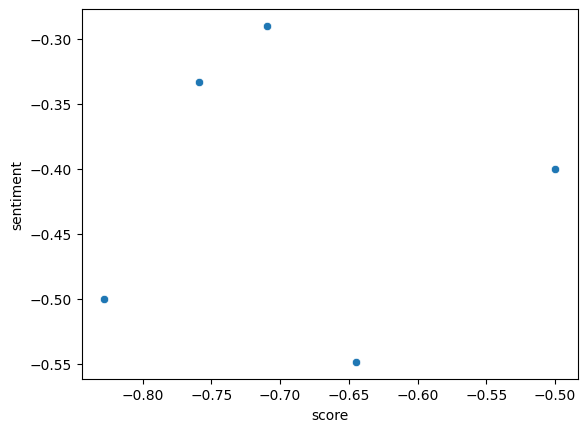

In [71]:
avg_score = df_bias.groupby('cluster')[['sentiment', 'score']].mean()
sns.scatterplot(data=avg_score, y='sentiment', x='score')

Text(0.5, 1.0, 'Distribution of Sentiment Scores')

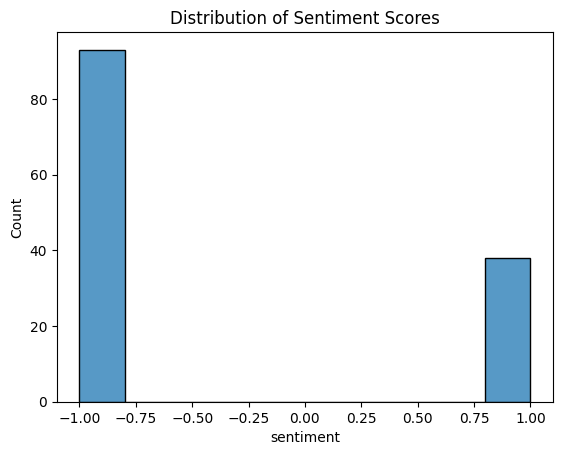

In [56]:
sns.histplot(df_bias['sentiment'], bins = 10)
plt.title('Distribution of Sentiment Scores')

Text(0.5, 1.0, 'Distribution of News Sites and Sentiment Scores')

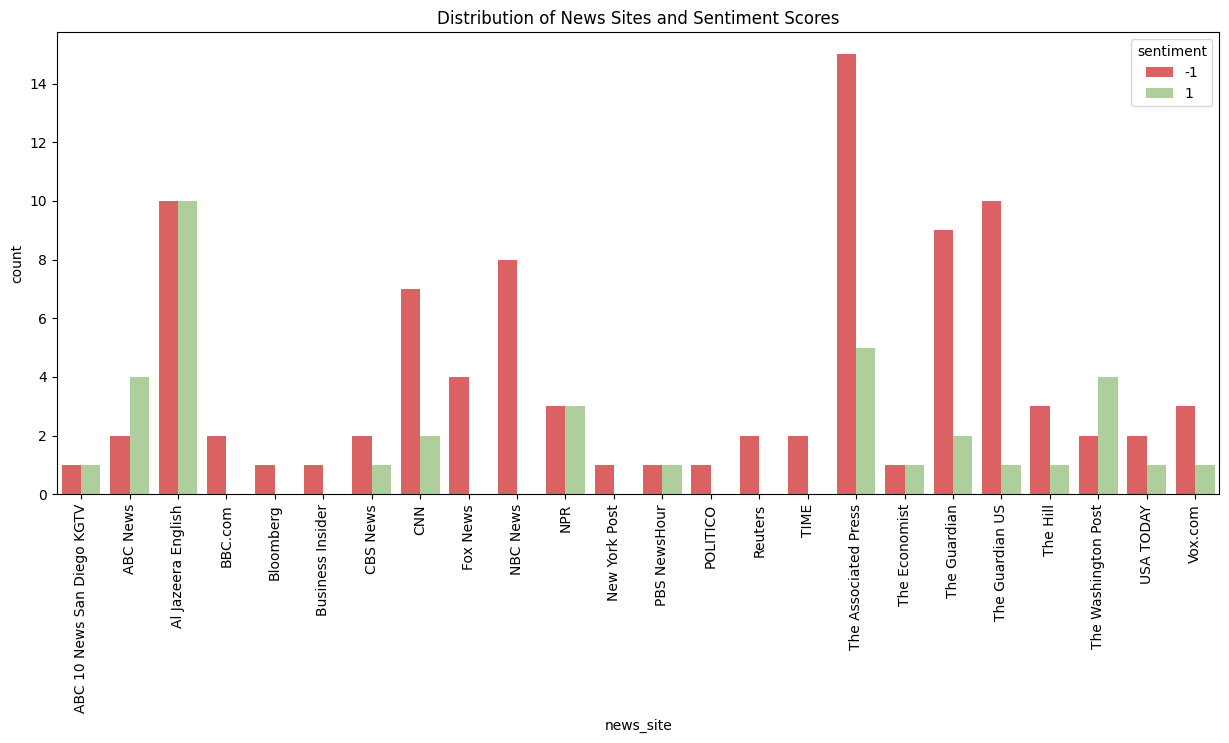

In [41]:
plt.figure(figsize=(15, 6)) 
sns.countplot(df_bias.sort_values('news_site'), x = 'news_site', hue='sentiment', palette = ['#EE4E4E', '#ACD793'])
plt.xticks(rotation=90)
plt.title('Distribution of News Sites and Sentiment Scores')

Text(0.5, 0, 'Political Leaning Score')

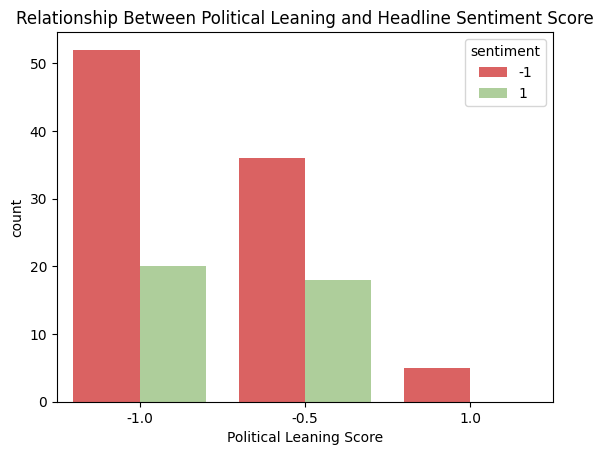

In [55]:
sns.countplot(df_bias, x = 'score', hue = 'sentiment', palette = ['#EE4E4E', '#ACD793'])
plt.title('Relationship Between Political Leaning and Headline Sentiment Score')
plt.xlabel('Political Leaning Score')


In [26]:
for title in df_bias[df_bias['sentiment'] == 1]['title']:
    print(title)

Where pro-Palestinian university protests are happening around the world
In pictures: A lookback at student protest movements in the US
Students at prestigious Paris university occupy campus building in pro-Palestinian protest
Pro-Palestinian student protests have created a new challenge for President Biden
What is the endgame for college protesters? AP answers reader questions
How Columbia became the force behind pro-Palestinian protests
Harvard students end protest as university agrees to discuss Middle East conflict
College encampments protesting Israeli military operations in Gaza grow nationwide: What students are saying
Jewish student protesters celebrate Passover Seder in encampments
Organizing massive campus protests required logistical savvy. Here's how students pulled it off.
How some colleges have de-escalated campus protests and negotiated with students
UCSD students organize large protest in support of Palestine
John Hopkins University students, alumni and staff join pro-P

In [27]:
for title in df_bias[df_bias['sentiment'] == -1]['title']:
    print(title)

Students at more universities announce solidarity rallies after 108 pro-Palestinian activists are arrested at Columbia
April 27, 2024 - Campus protest updates
At the student protest at UPenn, passions are clear and dialogue is lacking
April 29, 2024 - Columbia begins suspending student protesters
How universities are cracking down on a swell of tension months into student protests over Israel’s bombardment of Gaza
Encampments cleared from at least 3 university campuses early Friday as pro-Palestinian demonstrations continue
Columbia University president hit with no-confidence vote from faculty group over handling of pro-Palestinian campus protests
Critics fear University of Michigan's protest policy hurts free speech
College protests: Police arrest pro-Palestinian student protesters at USC
Pro-Palestinian protests sweep US colleges after Columbia arrests
Students protesting on campuses across US ask colleges to cut investments supporting Israel
Anti-war campus protests: Some colleges d

In [28]:
import statsmodels.api as sm

Y = df_bias['sentiment'].values
X = df_bias['score'].values

model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.109
Model:                            OLS   Adj. R-squared (uncentered):              0.102
Method:                 Least Squares   F-statistic:                              15.96
Date:                Tue, 04 Jun 2024   Prob (F-statistic):                    0.000108
Time:                        02:10:08   Log-Likelihood:                         -178.30
No. Observations:                 131   AIC:                                      358.6
Df Residuals:                     130   BIC:                                      361.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [29]:
#TF-IDF up next